In [1]:
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df=load_dataset('lukebarousse/data_jobs',split='train').to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US =df[df['job_country']=='United States']
df_exploaded =df_US.explode('job_skills')

In [3]:
df_exploaded=df_exploaded.groupby(['job_skills','job_title_short']).size().reset_index(name='skill_count')
df_sorted=df_exploaded.sort_values(by='skill_count',ascending=False)
df_sorted.head(10)

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
1522,sql,Data Engineer,23958
1208,python,Data Engineer,22762
1611,tableau,Data Analyst,19311
1207,python,Data Analyst,18382
123,aws,Data Engineer,15018


In [5]:
df_total= df_US['job_title_short'].value_counts().head(3).reset_index()

In [6]:
top_3_job_titles = sorted(df_sorted['job_title_short'].unique()[:3].tolist())
df_top_3 = pd.concat([df_sorted[df_sorted['job_title_short'] == job] for job in top_3_job_titles])
df_top_3=df_top_3.reset_index().drop('index',axis=1)
df_top_3=pd.merge(df_top_3,df_total,on=['job_title_short'],how='left')
df_top_3

,job_skills,job_title_short,skill_count,count
0,sql,Data Analyst,34452,67816
1,excel,Data Analyst,27519,67816
2,tableau,Data Analyst,19311,67816
3,python,Data Analyst,18382,67816
4,sas,Data Analyst,13200,67816
...,...,...,...,...
662,couchdb,Data Scientist,1,58830
663,fedora,Data Scientist,1,58830
664,asp.net core,Data Scientist,1,58830
665,nuix,Data Scientist,1,58830


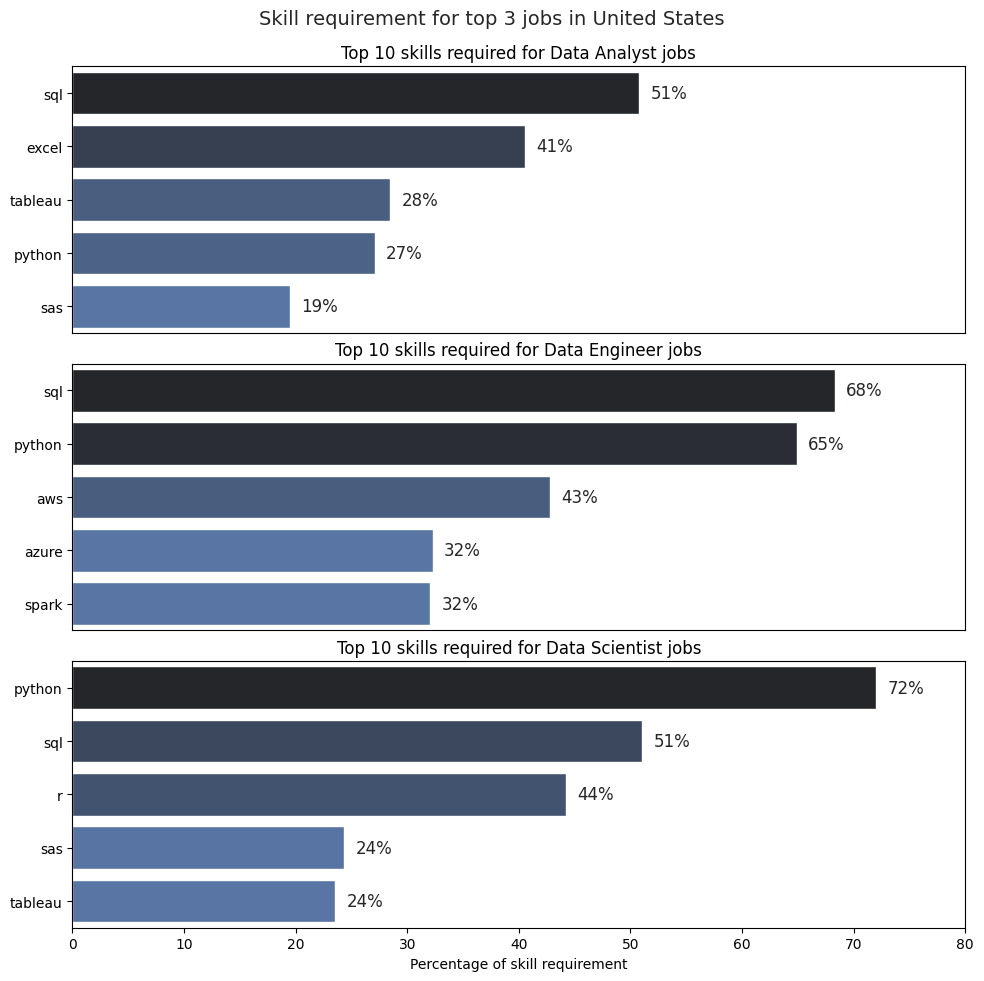

In [9]:
#Visualization
fig,ax= plt.subplots(3,1, figsize=(10,10))
sns.set_theme(style='whitegrid')
for i,job in enumerate(top_3_job_titles):
    df_current_job =df_top_3[df_top_3['job_title_short']==job].head(5)
    df_current_job['skill_pct']=(df_current_job['skill_count']/df_current_job['count'])*100
    sns.barplot(df_current_job,y='job_skills',x='skill_pct',ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].set_title(f'Top 10 skills required for {job} jobs',fontsize=12)
    ax[i].set_xlim(0,80)
    ax[i].legend().set_visible(False)
    if i!=len(top_3_job_titles)-1:
         ax[i].set_xticks([])
         ax[i].set_xlabel('')
    else:
         ax[i].set_xlabel('Percentage of skill requirement')
    for n,v in enumerate(df_current_job['skill_pct']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')
fig.suptitle('Skill requirement for top 3 jobs in United States', fontsize=14)
fig.tight_layout(h_pad=0.5)
plt.show()